In [37]:
#importing libs for data handling and data plotting.
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#reading csv archive with suvey
df = pd.read_csv('survey_responses-export-2025-11-18_11-43-08.csv', sep=';')

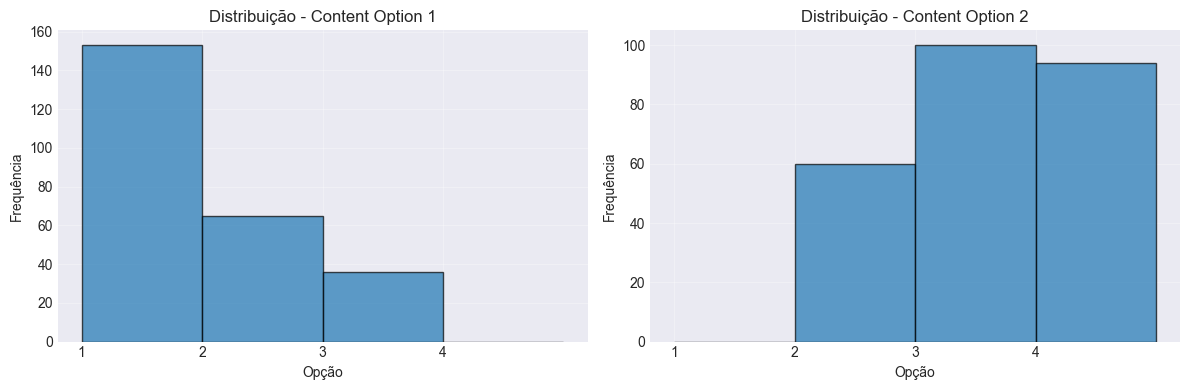

In [44]:
import matplotlib.pyplot as plt

# Estilo igual ao da imagem
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

bins = [1, 2, 3, 4, 5]  # fecha corretamente o intervalo

# ===== HISTOGRAMA 1 =====
ax1 = axes[0]
ax1.hist(df['content_option_1'], bins=bins, edgecolor='black', alpha=0.7)
ax1.set_xticks([1, 2, 3, 4])
ax1.set_title('Distribuição - Content Option 1')
ax1.set_xlabel('Opção')
ax1.set_ylabel('Frequência')
ax1.grid(True, alpha=0.3)

# ===== HISTOGRAMA 2 =====
ax2 = axes[1]
ax2.hist(df['content_option_2'], bins=bins, edgecolor='black', alpha=0.7)
ax2.set_xticks([1, 2, 3, 4])
ax2.set_title('Distribuição - Content Option 2')
ax2.set_xlabel('Opção')
ax2.set_ylabel('Frequência')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
